In [51]:
import numpy as np
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [29]:
import os
path = '/home/thirza/Cusize_python/PyRipser/python'
os.chdir(path)

from unionfind import UnionFind

In [30]:
ql_file = Dataset('/home/thirza/Cusize_python/subsubdomain_lasttimestep.nc','r',format='NETCDF4')
ncells = ql_file.variables['ncells'][:]

In [31]:
grid = Dataset('/home/thirza/Cusize_python/subsubgrid.nc','r',format='NETCDF4')
clon = grid.variables['clon'][:]
clat = grid.variables['clat'][:]
clon_vertices = grid.variables['clon_vertices'][:]
clat_vertices = grid.variables['clat_vertices'][:]
cell_area = grid.variables['cell_area'][:]
neighbor_cell_index = grid.variables['neighbor_cell_index'][:]


In [32]:
ql = ql_file.variables['qc'][0,:]
ql_proj = np.sum(ql,axis=0)
ql_binary = np.where(ql_proj>1E-8,1,0)

print ql_binary[347]
print neighbor_cell_index[:,108]
print neighbor_cell_index[:,109]

1
[108 115 357]
[182 112 117]


In [33]:
cloud_1 = np.array([1061, 1071, 1062, 1070, 1064, 1063, 3515])
print cloud_1
cloud_2 = np.array([9440, 9448, 9441, 9454, 9443, 9461, 9444])

[1061 1071 1062 1070 1064 1063 3515]


In [34]:
idx_clouds = np.array(np.where(ql_binary))[0]
nr_cloud_cells = len(idx_clouds)
test = UnionFind(nr_cloud_cells)

counter = 0

for j in range(0,nr_cloud_cells):
#for j in range(0,10):
    cell_1 = idx_clouds[j]
    
    for i in range(0,3):
        cell_2 = neighbor_cell_index[i,cell_1]-1  #python starts at 0, causing a difference of 1!
        if cell_2 != -1:
            if ql_binary[cell_2]: 
                idx_2 = np.where(idx_clouds==cell_2)
                test.link(j,idx_2)
                counter += 1

#print 'counter:',counter

for j in range(0, nr_cloud_cells):
    test.find(j)
    

indextoomuch = np.where(test.parent==563)
    
#print indextoomuch

#print idx_clouds[indextoomuch]

print neighbor_cell_index[:,9457]
print neighbor_cell_index[:,9461]

print clon_vertices[9457,:]
print clon_vertices[9461,:]



[  -1   -1 9462]
[9461 9455   -1]
[-0.99481574 -0.99485377 -0.99483454]
[-0.99483454 -0.99479651 -0.99481574]


In [35]:
def cloudcentre(cloud_cells,clon,clat,darea):
    max_lon = np.max(clon[cloud_cells])
    min_lon = np.min(clon[cloud_cells])
    cloud_lon = (max_lon+min_lon)/2
    max_lat = np.max(clat[cloud_cells])
    min_lat = np.min(clat[cloud_cells])
    cloud_lat = (max_lat+min_lat)/2
    cloud_area = len(idx_parent[0])*darea
    cloud_size = (cloud_area/math.pi)**0.5
    return cloud_lon, cloud_lat, cloud_size

In [36]:
parents = set(test.parent)
nr_clouds = len(parents)

cloud_label = 0
cloud_size = np.zeros(nr_clouds)
cloud_lon = np.zeros(nr_clouds)
cloud_lat = np.zeros(nr_clouds)

for p in parents:
    #print '%d --- %s' % (p, np.where(test.parent == p))
    idx_parent = np.where(test.parent == p)
    cloud_cells = idx_clouds[idx_parent]
    centre = cloudcentre(cloud_cells,clon,clat,darea)
    cloud_lon[cloud_label] = centre[0]
    cloud_lat[cloud_label] = centre[1]
    cloud_size[cloud_label] = centre[2]
    cloud_label += 1



In [59]:
darea = max(cell_area)

step = (darea/math.pi)**0.5
sizemin = (darea/math.pi)**0.5
sizemax = ((ncells*darea)/math.pi)**0.5
bin_edges = np.arange(sizemin, sizemax, step) # sizemin or 0?

#darea:   23857.8848    
# total area:   360892224.    
#sizemin=   154.459976    
#sizemax=   19002.9707    
#nr of bins =  124
  
freq, edges = np.histogram(cloud_size, bins=bin_edges, density=True)

#fig, ax = plt.subplots()


87.14471201402543
sizemin: 87.14471201402543
sizemax: [10721.27901853]
darea: 23857.88554372003
124.0


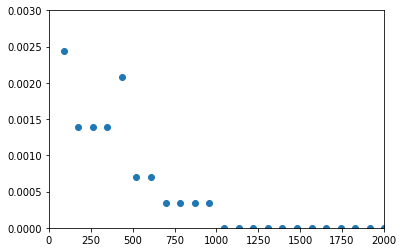

In [62]:
plt.figure()
axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([0,0.003])
plt.scatter(edges[:-1], freq)

#ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")